## Selecting Data for Modeling

Your dataset had too many variables to wrap your head around, or even to print out nicely. How can you pare down this overwhelming amount of data to something you can understand?

We'll start by picking a few variables using our intuition. Later courses will show you statistical techniques to automatically prioritize variables.

To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the **columns** property of the DataFrame (the bottom line of code below).

In [2]:
import pandas as pd

#melbourne_file_path = '../input/2.Basic Data Exploration/melb_data.csv'
melbourne_data = pd.read_csv('2.Basic Data Exploration/melb_data.csv') 
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [3]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

There are many ways to select a subset of your data. The Pandas course covers these in more depth, but we will focus on two approaches for now.

1. Dot notation, which we use to select the "prediction target"
2. Selecting with a column list, which we use to select the "features"

### Selecting The Prediction Target

You can pull out a variable with **dot-notation**. This single column is stored in a **Series**, which is broadly like a DataFrame with only a single column of data.

We'll use the dot notation to select the column we want to predict, which is called the **prediction target**. By convention, the prediction target is called **y**. So the code we need to save the house prices in the Melbourne data is

In [4]:
y = melbourne_data.Price

## Choosing "Features"

The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

Here is an example:

In [5]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

By convention, this data is called **X**.

In [6]:
X = melbourne_data[melbourne_features]
print(X)

       Rooms  Bathroom  Landsize  Lattitude  Longtitude
1          2       1.0     156.0  -37.80790   144.99340
2          3       2.0     134.0  -37.80930   144.99440
4          4       1.0     120.0  -37.80720   144.99410
6          3       2.0     245.0  -37.80240   144.99930
7          2       1.0     256.0  -37.80600   144.99540
...      ...       ...       ...        ...         ...
12205      3       2.0     972.0  -37.51232   145.13282
12206      3       1.0     179.0  -37.86558   144.90474
12207      1       1.0       0.0  -37.85588   144.89936
12209      2       1.0       0.0  -37.85581   144.99025
12212      6       3.0    1087.0  -37.81038   144.89389

[6196 rows x 5 columns]


Let's quickly review the data we'll be using to predict house prices using the describe method and the head method, which shows the top few rows.

In [7]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [8]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


Visually checking your data with these commands is an important part of a data scientist's job. You'll frequently find surprises in the dataset that deserve further inspection.

## Building Your Model (Important!)

You will use the **scikit-learn library** to create your models. When coding, this library is written as sklearn, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

* **Define**: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
* **Fit**: Capture patterns from provided data. This is the heart of modeling.
* **Predict**: Just what it sounds like
* **Evaluate**: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Many machine learning models allow some randomness in model training. Specifying a number for `random_state` ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.

In [10]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


## Exercises

In [11]:
# Code you have previously used to load data
import pandas as pd

home_data = pd.read_csv('3. Your First Machine Learning Model/train.csv')

## Step 1: Specify Prediction Target

Select the target variable, which corresponds to the sales price. Save this to a new variable called y. You'll need to print a list of the columns to find the name of the column you need.

In [12]:
# print the list of columns in the dataset to find the name of the prediction target
list(home_data.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [13]:
y = home_data.SalePrice

## Step 2: Create X
Now you will create a DataFrame called `X` holding the predictive features.

Since you want only some columns from the original data, you'll first create a list with the names of the columns you want in `X`.

You'll use just the following columns in the list (you can copy and paste the whole list to save some typing, though you'll still need to add quotes):
    * LotArea
    * YearBuilt
    * 1stFlrSF
    * 2ndFlrSF
    * FullBath
    * BedroomAbvGr
    * TotRmsAbvGrd

After you've created that list of features, use it to create the DataFrame that you'll use to fit the model.

In [14]:
# Create the list of features below
feature_names = [ 'LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr', 'TotRmsAbvGrd']

# Select data corresponding to features in feature_names
X = home_data[feature_names]

## Review Data
Before building a model, take a quick look at **X** to verify it looks sensible


In [15]:
# Review data
# print description or statistics from X
print(X)

# print the top few lines
print(X.head())

      LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0        8450       2003       856       854         2             3   
1        9600       1976      1262         0         2             3   
2       11250       2001       920       866         2             3   
3        9550       1915       961       756         1             3   
4       14260       2000      1145      1053         2             4   
...       ...        ...       ...       ...       ...           ...   
1455     7917       1999       953       694         2             3   
1456    13175       1978      2073         0         2             3   
1457     9042       1941      1188      1152         2             4   
1458     9717       1950      1078         0         1             2   
1459     9937       1965      1256         0         1             3   

      TotRmsAbvGrd  
0                8  
1                6  
2                6  
3                7  
4                9  
...      

## Step 3: Specify and Fit Model
Create a `DecisionTreeRegressor` and save it iowa_model. Ensure you've done the relevant import from sklearn to run this command.

Then fit the model you just created using the data in `X` and `y` that you saved above.

In [16]:
from sklearn.tree import DecisionTreeRegressor 
#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model = DecisionTreeRegressor(random_state=1)

# Fit model
iowa_model.fit(X, y)


DecisionTreeRegressor(random_state=1)

## Step 4: Make Predictions
Make predictions with the model's `predict` command using `X` as the data. Save the results to a variable called `predictions`.

In [17]:
predictions = iowa_model.predict(X)
print(predictions)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


In [18]:
# You can write code in this cell
print('Prediction is','\n')
print(iowa_model.predict(X.head()),'\n')
print('Actual value is','\n')
print(y.head())

Prediction is 

[208500. 181500. 223500. 140000. 250000.] 

Actual value is 

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


## Extra

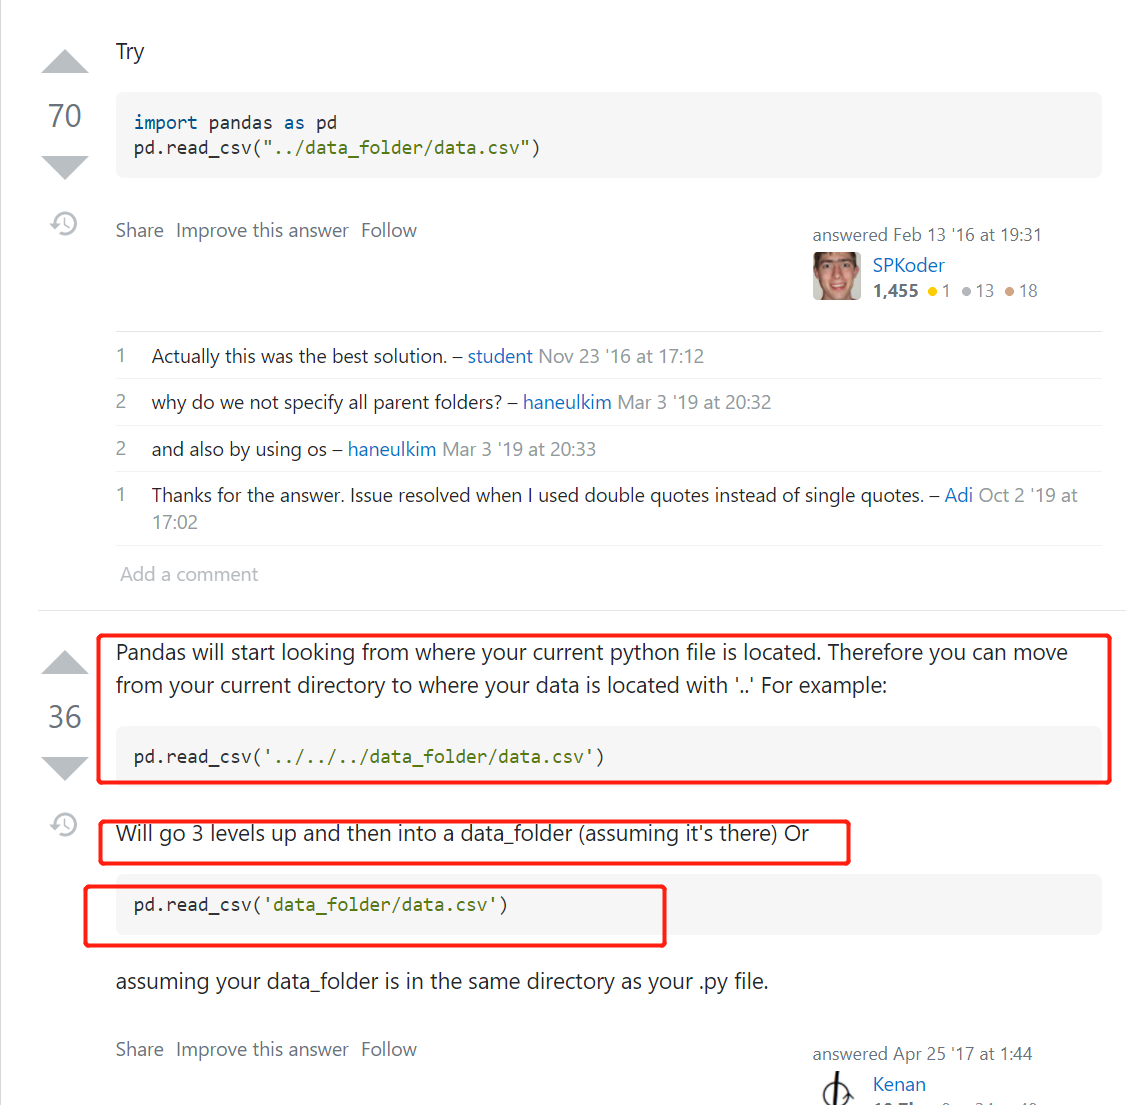


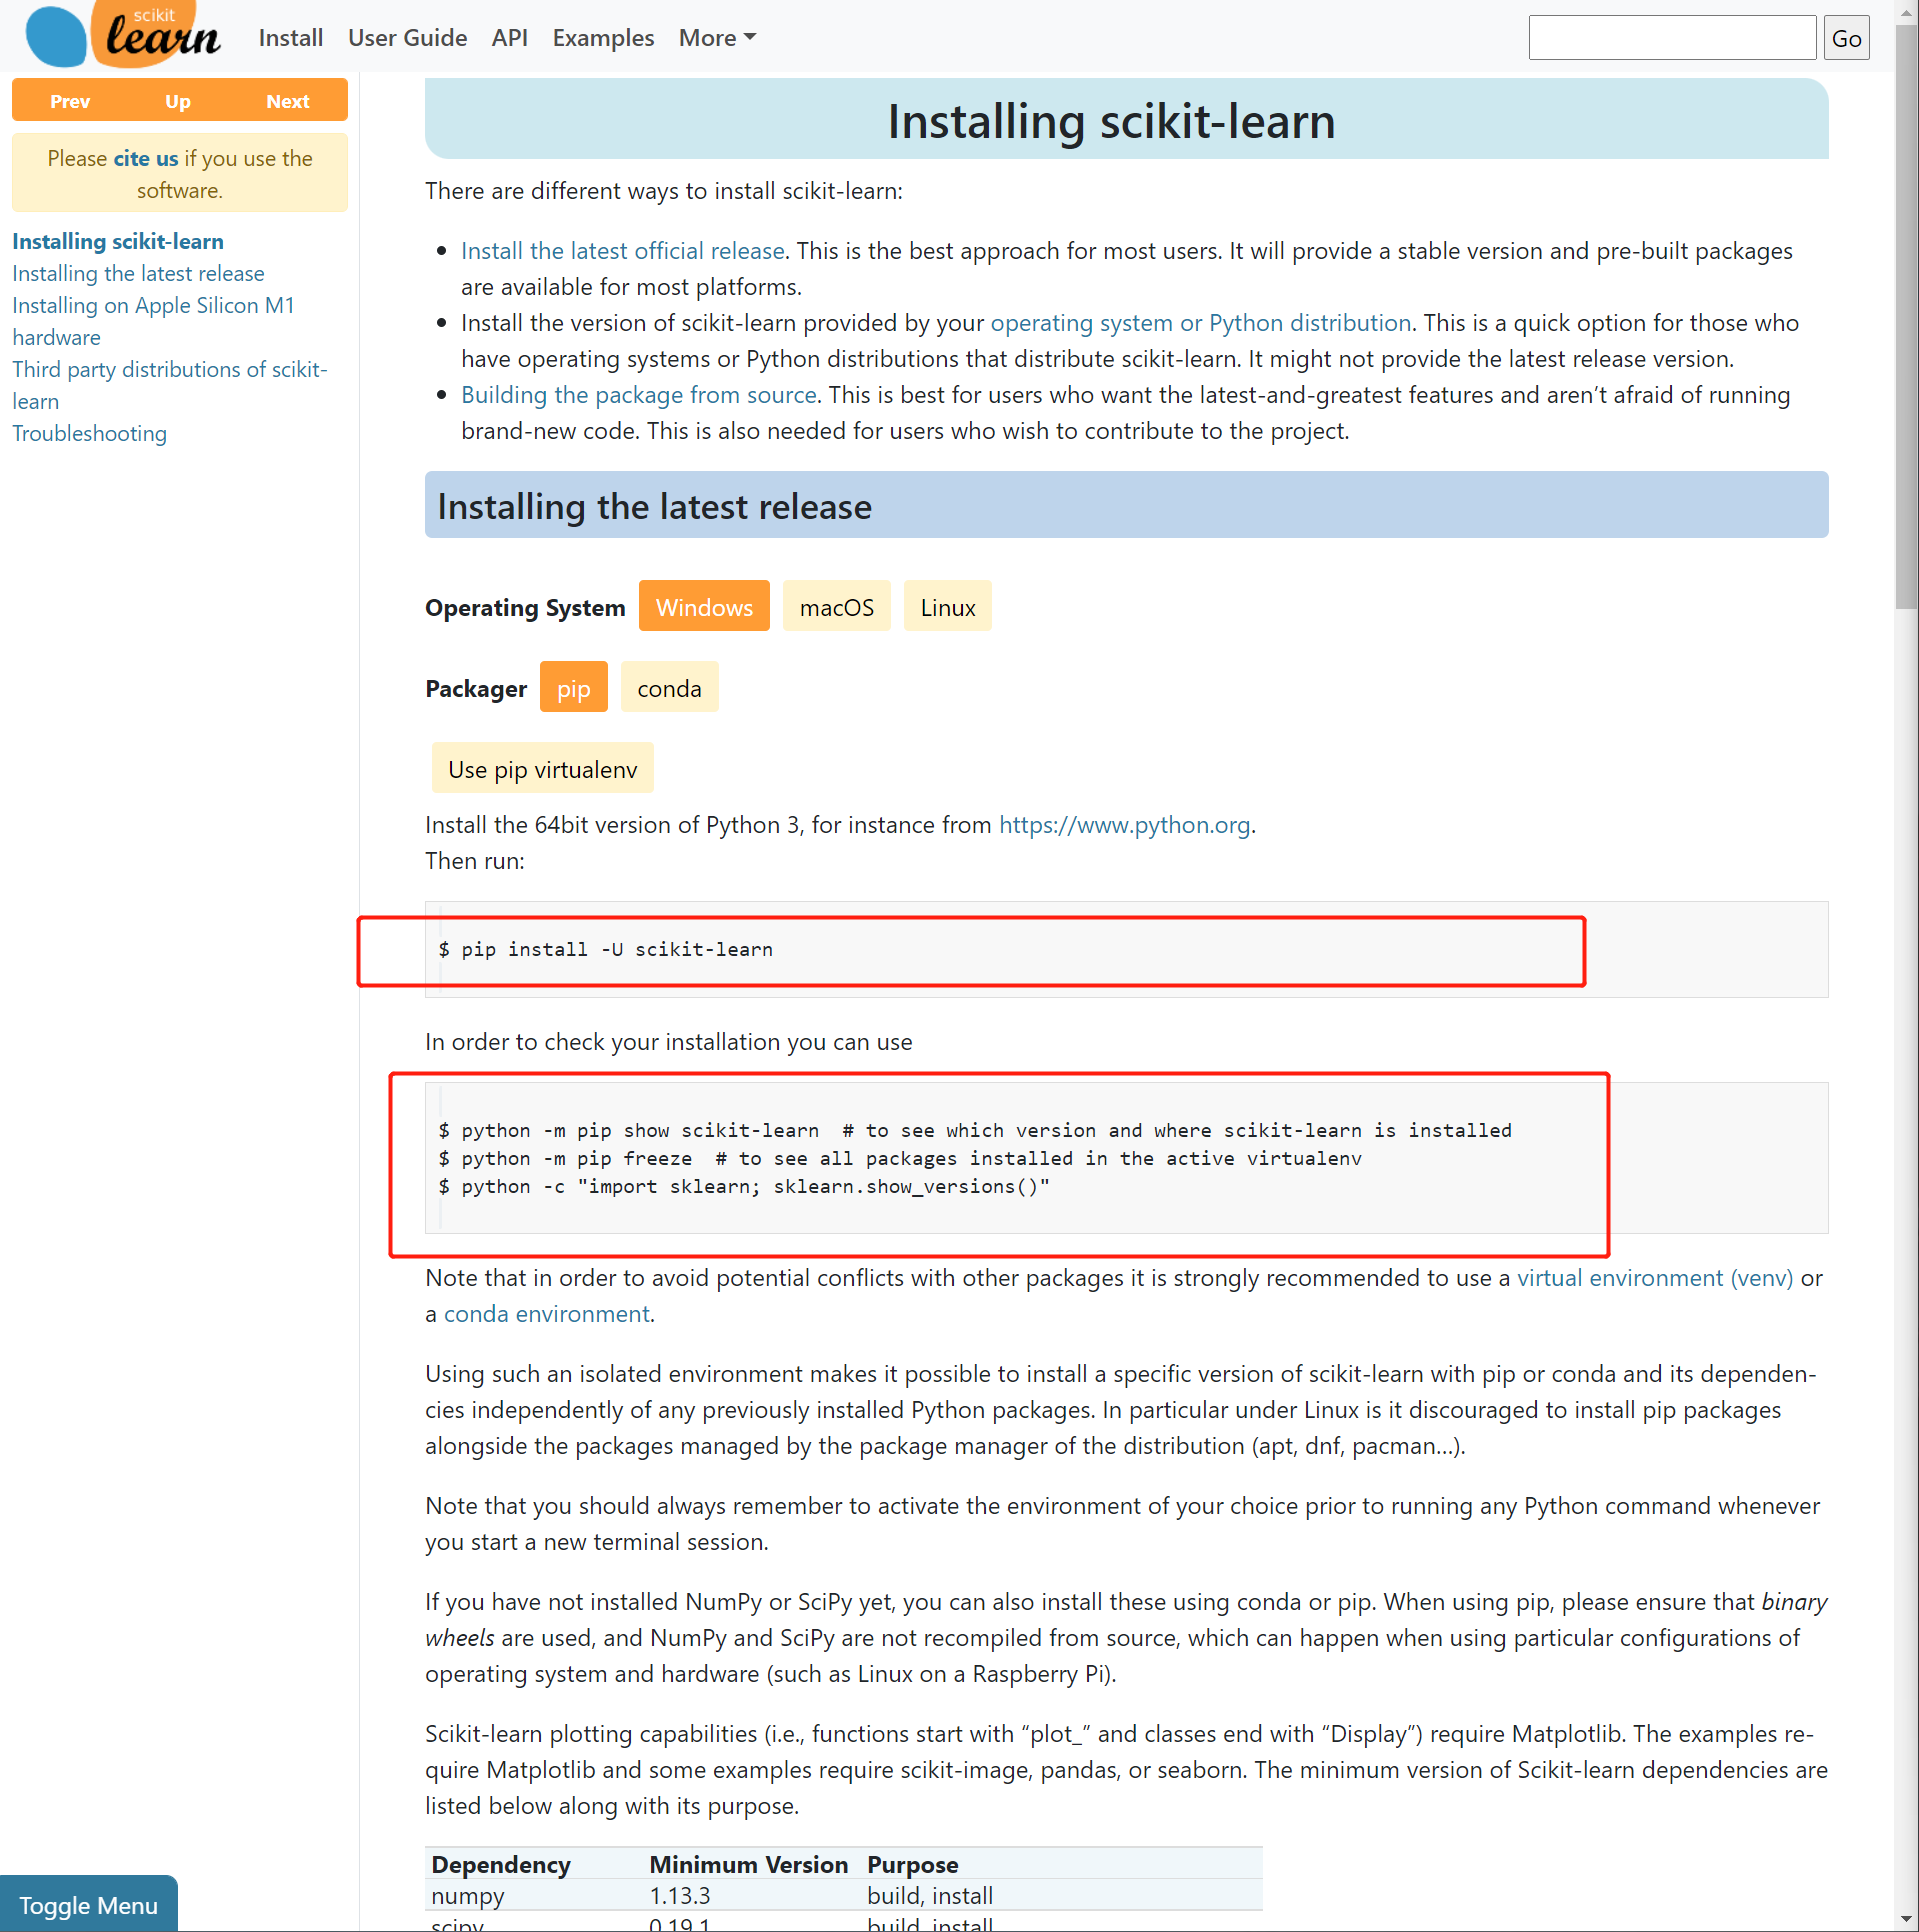